<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Box-plots-for-cells-H-score" data-toc-modified-id="Box-plots-for-cells-H-score-5">Box plots for cells H score</a></span></li></ul></div>

# Dependencies

In [1]:
library(ggplot2)
library(reshape2)

# Functions

In [34]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")

# Paths

In [67]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

Load raw scoring spreadsheets

In [68]:
cd4ihc_raw <- read.csv(paste0(datapath, "IHC/Alberto/CD4_raw.csv"),
                  header = TRUE, stringsAsFactors = F, na.strings = "")

cd8ihc_raw <- read.csv(paste0(datapath, "IHC/Alberto/CD8_raw.csv"),
                  header = TRUE, stringsAsFactors = F, na.strings = "")

cd19ihc_raw <- read.csv(paste0(datapath, "IHC/Alberto/CD19_raw.csv"),
                  header = TRUE, stringsAsFactors = F, na.strings = "")

In [69]:
cd4ihc_raw

organ,ID,Column,Row,X.,Intensity,type
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
NA,NA,1,1,NA,NA,NA
NA,NA,2,1,NA,NA,NA
NA,NA,3,1,NA,NA,NA
breast,NA,4,1,NA,NA,normal
breast,NA,5,1,NA,NA,normal
breast,NA,6,1,NA,NA,normal
breast,NA,7,1,NA,NA,normal
breast,NA,8,1,NA,NA,normal
liver,NA,9,1,NA,NA,normal


Clean up column ID

In [5]:
cd4ihc_raw$ptid <- gsub(" .*", "", cd4ihc_raw$ID)
cd8ihc_raw$ptid <- gsub(" .*", "", cd8ihc_raw$ID)
cd19ihc_raw$ptid <- gsub(" .*", "", cd19ihc_raw$ID)

Load aggregated files

In [61]:
cd4ihc <- read.csv(paste0(datapath, "IHC/Alberto/agg.df.CD4.csv"),header = TRUE, stringsAsFactors = F)

cd8ihc <- read.csv(paste0(datapath, "IHC/Alberto/agg.df.CD8.csv"),header = TRUE, stringsAsFactors = F)

cd19ihc <- read.csv(paste0(datapath, "IHC/Alberto/agg.df.CD19.csv"),header = TRUE, stringsAsFactors = F)

In [62]:
cd4ihc

X,block,type,H.score,Subtype
<int>,<chr>,<chr>,<dbl>,<chr>
1,PAPHZW,ATRT,0.00,ATRT
2,PAPRJE,ATRT,0.00,ATRT
3,PARPCH,ATRT,0.00,ATRT
4,PARUCK,ATRT,0.00,ATRT
5,PATKWM,ATRT,0.00,ATRT
6,PATMWL,ATRT,27.00,ATRT
7,PATUIN,ATRT,15.00,ATRT
8,PAUETI,ATRT,5.25,ATRT
9,PAVXUM,ATRT,0.00,ATRT


In [7]:
colnames(cd4ihc)[colnames(cd4ihc) == "block"] <- "ptid"
colnames(cd8ihc)[colnames(cd8ihc) == "block"] <- "ptid"
colnames(cd19ihc)[colnames(cd19ihc) == "block"] <- "ptid"

Clean the raw csv files using IDs from aggregated files. Convert NAs to zeros

In [8]:
cd4ihc_raw_clean <- cd4ihc_raw[cd4ihc_raw$ptid %in% cd4ihc$ptid,]
cd8ihc_raw_clean <- cd8ihc_raw[cd8ihc_raw$ptid %in% cd8ihc$ptid,]
cd19ihc_raw_clean <- cd19ihc_raw[cd19ihc_raw$ptid %in% cd19ihc$ptid,]

In [9]:
cd4ihc_raw_clean$X.[is.na(cd4ihc_raw_clean$X.)] <- 0
cd4ihc_raw_clean$Intensity[is.na(cd4ihc_raw_clean$Intensity)] <- 0

In [10]:
cd8ihc_raw_clean$X.[is.na(cd8ihc_raw_clean$X.)] <- 0
cd8ihc_raw_clean$Intensity[is.na(cd8ihc_raw_clean$Intensity)] <- 0

In [11]:
cd19ihc_raw_clean$X.[is.na(cd19ihc_raw_clean$X.)] <- 0
cd19ihc_raw_clean$Intensity[is.na(cd19ihc_raw_clean$Intensity)] <- 0

H score for comparison with aggregated file

In [12]:
cd4ihc_raw_clean$Hscore <- cd4ihc_raw_clean$Intensity * cd4ihc_raw_clean$X.
cd8ihc_raw_clean$Hscore <- cd8ihc_raw_clean$Intensity * cd8ihc_raw_clean$X.
cd19ihc_raw_clean$Hscore <- cd19ihc_raw_clean$Intensity * cd19ihc_raw_clean$X.

Aggregate by mean

In [13]:
aggcd4 <- aggregate(cd4ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd4ihc_raw_clean$ptid),FUN = mean)
colnames(aggcd4)[colnames(aggcd4) == "Group.1"] <- "ptid"

In [14]:
aggcd8 <- aggregate(cd8ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd8ihc_raw_clean$ptid),FUN = mean)
colnames(aggcd8)[colnames(aggcd8) == "Group.1"] <- "ptid"

In [15]:
aggcd4 <- aggregate(cd4ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd4ihc_raw_clean$ptid),FUN = mean)
colnames(aggcd4)[colnames(aggcd4) == "Group.1"] <- "ptid"

In [16]:
aggcd19 <- aggregate(cd19ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd19ihc_raw_clean$ptid),FUN = mean)
colnames(aggcd19)[colnames(aggcd19) == "Group.1"] <- "ptid"

In [17]:
cd4_merge <- merge(aggcd4, cd4ihc[, c("ptid", "type", "Subtype", "H.score")], by = "ptid")
cd8_merge <- merge(aggcd8, cd8ihc[, c("ptid", "type", "Subtype", "H.score")], by = "ptid")
cd19_merge <- merge(aggcd19, cd19ihc[, c("ptid", "type", "Subtype", "H.score")], by = "ptid")

In [18]:
cd4ihc_subset <- cd4_merge[cd4_merge$type != "Wilms" &cd4_merge$type != "Hepatoblastoma",]
cd8ihc_subset <- cd8_merge[cd8_merge$type != "Wilms" &cd8_merge$type != "Hepatoblastoma",]
cd19ihc_subset <- cd19_merge[cd19_merge$type != "Wilms" &cd19_merge$type != "Hepatoblastoma",]

In [19]:
cd8ihc_subset$type <- as.character(cd8ihc_subset$type)
cd4ihc_subset$type <- as.character(cd4ihc_subset$type)
cd19ihc_subset$type <- as.character(cd19ihc_subset$type)

In [20]:
cd4ihc_subset$type[grepl("NBL", cd4ihc_subset$Subtype)] <- "NBL"
cd8ihc_subset$type[grepl("NBL", cd8ihc_subset$Subtype)] <- "NBL"
cd19ihc_subset$type[grepl("NBL", cd19ihc_subset$Subtype)] <- "NBL"

In [26]:
cd4ihc_subset$type[ cd4ihc_subset$type == "Ependymoma"] <- "EPN"
cd4ihc_subset$type[ cd4ihc_subset$type == "Medulloblastoma"] <- "MB"
cd4ihc_subset$type[ cd4ihc_subset$type == "High Grade Glioma"] <- "pedHGG"

In [44]:
cd8ihc_subset$type[ cd8ihc_subset$type == "Ependymoma"] <- "EPN"
cd8ihc_subset$type[ cd8ihc_subset$type == "Medulloblastoma"] <- "MB"
cd8ihc_subset$type[ cd8ihc_subset$type == "High Grade Glioma"] <- "pedHGG"

In [45]:
cd19ihc_subset$type[ cd19ihc_subset$type == "Ependymoma"] <- "EPN"
cd19ihc_subset$type[ cd19ihc_subset$type == "Medulloblastoma"] <- "MB"
cd19ihc_subset$type[ cd19ihc_subset$type == "High Grade Glioma"] <- "pedHGG"

In [27]:
table(cd4ihc_subset$type)


  ATRT    EPN     MB    NBL pedHGG 
     9     20     64     33     13 

# Box plots for cells H score

In [72]:
tapply(cd19ihc_subset$H.score, cd19ihc_subset$type, summary)

$ATRT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.389   2.000   7.500 

$EPN
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.025   1.625   6.000 

$MB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1846  0.0000  7.5000 

$NBL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   3.000   9.091  12.000  45.000 

$pedHGG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9231  0.0000  7.5000 


In [28]:
head(cd4ihc_subset)

,ptid,X.,Intensity,Hscore,type,Subtype,H.score
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
5,PALHHT,0,0,0,NBL,NBL stage 4,0
7,PALNFP,0,0,0,NBL,NBL stage 3,0
9,PALTAL,0,0,0,NBL,NBL stage 4,0
10,PALTLX,0,0,0,NBL,NBL stage 3,0
11,PALWKV,0,0,0,NBL,NBL stage 3,0
12,PAMHLN,0,0,0,NBL,NBL stage 3,0


In [40]:
plotcd4 <- ggplot() +
geom_boxplot(data = cd4ihc_subset, aes(x = type ,y = H.score), size = 1, fill = "light grey") +
theme(legend.position = "bottom", legend.title = element_blank()) +
theme(axis.title.x = element_blank(), axis.title = element_text(size = 35),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 35, color = "black"),
      axis.text.y = element_text(size = 35, color = "black")) +
myplot +
scale_y_continuous(breaks = seq(0,30, by = 5)) +
labs(y = "H score CD4")

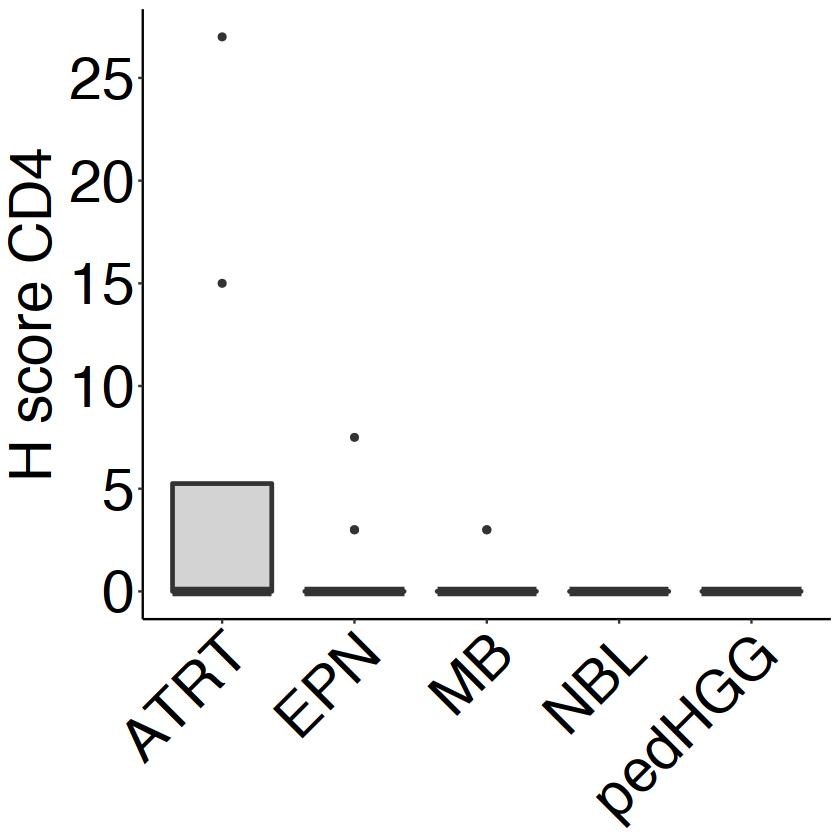

In [41]:
plotcd4

In [48]:
plotcd8 <- ggplot() +
geom_boxplot(data = cd8ihc_subset, aes(x = type ,y = H.score), size = 1, fill = "light grey") +
theme(legend.position = "bottom", legend.title = element_blank()) +
theme(axis.title.x = element_blank(), axis.title = element_text(size = 35),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 35, color = "black"),
      axis.text.y = element_text(size = 35, color = "black")) +
myplot +
scale_y_continuous(breaks = seq(0,60, by = 10)) +
labs(y = "H score CD8")

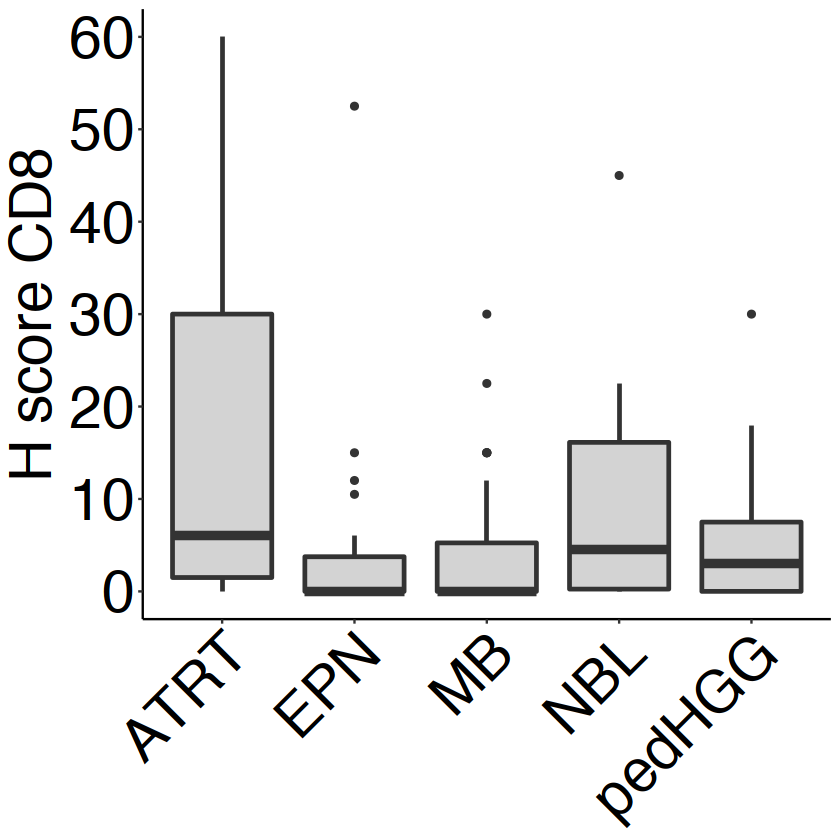

In [49]:
plotcd8

In [50]:
plotcd19 <- ggplot() +
geom_boxplot(data = cd19ihc_subset, aes(x = type ,y = H.score), size = 1, fill = "light grey") +
theme(legend.position = "bottom", legend.title = element_blank()) +
theme(axis.title.x = element_blank(), axis.title = element_text(size = 35),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 35, color = "black"),
      axis.text.y = element_text(size = 35, color = "black")) +
myplot +
scale_y_continuous(breaks = seq(0,60, by = 10)) +
labs(y = "H score CD19")

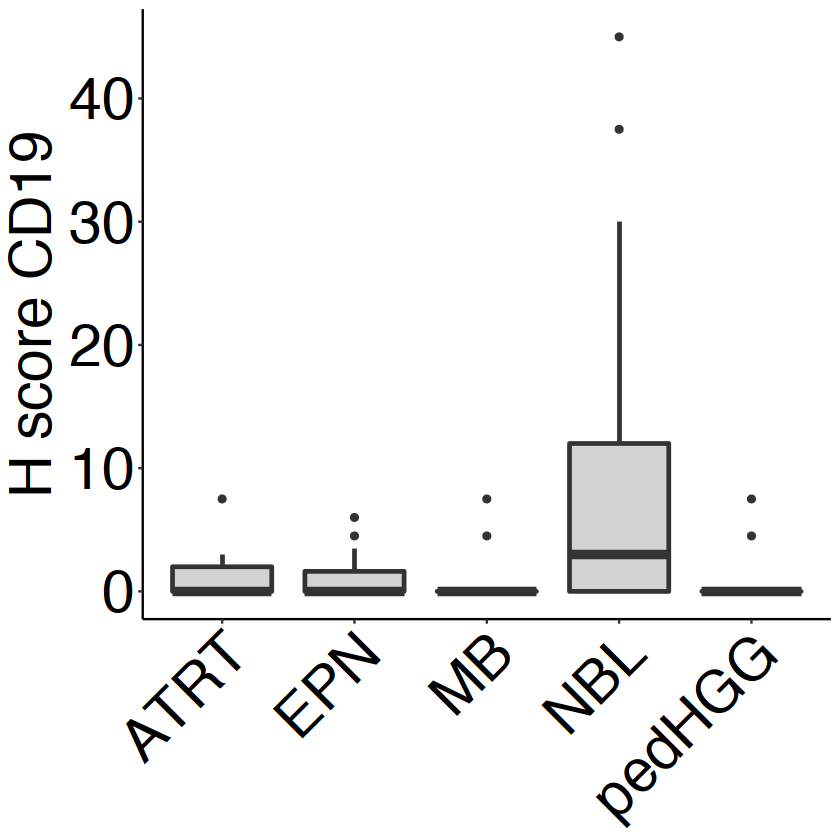

In [51]:
plotcd19

In [52]:

    pdf(file = paste0(plotpath,"CD19_H_plot.pdf"),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(plotcd19)
    dev.off()


pdf 
  2

In [53]:

    pdf(file = paste0(plotpath,"CD8_H_plot.pdf"),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(plotcd8)
    dev.off()


pdf 
  2

In [54]:
    pdf(file = paste0(plotpath,"CD4_H_plot.pdf"),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(plotcd4)
    dev.off()


pdf 
  2